In [1]:
source(file.path("../../src/00.0_init.R"))

Joining, by = "species"



In [2]:
library(kebabs)
library(caret)
library(ROCR)

Loading required package: kernlab


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:Biostrings’:

    type


The following object is masked from ‘package:BiocGenerics’:

    type


Loading required package: lattice


Attaching package: ‘ROCR’


The following object is masked from ‘package:kebabs’:

    performance




In [3]:
annot_full <- fread(file.path(analysis_dir, "validation", "03_WGBS", "WGBS_prediction_selection.tsv"))

In [4]:
head(annot_full)

Species,genomeId,Species_match,data_type,thr
<chr>,<chr>,<chr>,<chr>,<int>
Mus_musculus,mm9,MOU,CpG.calls.txt,10
Gallus_gallus,galGal5,CHK,cov_and_ratio,10
Phascolarctos_cinereus,phaCin_unsw_v4.1,KOA,CpGreport,10
Bos_taurus,bosTau9,ANW,CpGreport,10
Danio_rerio_GSE134055,danRer11,ZF,gemBS,10
Branchiostoma_lanceolatum,Bl71nemr,FLA,Misc,5


In [5]:
path_to_results <- file.path(analysis_dir, "validation", "03_WGBS", "03.4_prediction")

In [6]:
setwd(path_to_results)

In [7]:
dir.create("summary")

Warning message in dir.create("summary"):
“'summary' already exists”


In [8]:
models = list.files(pattern = "methPred", recursive = T) 

In [9]:
roc_res_full = data.table()
for(model_path in models){
    
model_name <- strsplit(model_path, "/")[[1]][4]
    
tryCatch({simpleCache(cacheName=gsub(".RData", "", model_name), instruction={ train_test(x_train=split_ds$x_train,
            x_test = split_ds$x_test, y_train = split_ds$y_train, y_test = split_ds$y_test,
                                                        ifRand='noRand', k=kmer, runid = 0)},
            cacheDir=gsub(model_name, "", model_path ), assignToVariable="res", recreate=FALSE)
roc_res=res$roc_dt   
roc_res$species <- strsplit(model_path, "/")[[1]][1]
roc_res$model <-model_name
roc_res_full <- rbind(roc_res_full, roc_res, fill = TRUE)}, error = function(cond){
    print(cond)
    print(model_name)
})
}

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_noRand_uc_1234.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_noRand_uc_441.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_noRand_uc_808.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_1_1234.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_1_441.RData



<simpleError in load(cacheFile): error reading from connection>
[1] "methPred_Rand_uc_1_441.RData"


::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_1_808.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_2_1234.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_2_441.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_2_808.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_3_1234.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_3_441.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_3_808.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_4_1234.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_4_441.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_4_808.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_5_1234.RData

::Loading cache::	Bos_taurus/kebabs_model/RCache//methPred_Rand_uc_5_441.RData

::Loading cache::	Bos_taurus/kebabs_

In [10]:
roc_res_full[, seedid:=gsub(".RData", "",
                            strsplit(model, "_")[[1]][length(strsplit(model, "_")[[1]])]),
                            by = row.names(roc_res_full)]
    
roc_res_full[, unique_run := paste0(run, "_", seedid), row.names(roc_res_full)]

setDT(roc_res_full)
my_wt(roc_res_full, file.path("summary", "model_results_combined.tsv"))

In [53]:
roc_res_full <- fread(file.path("summary", "model_results_combined.tsv"))

In [54]:
head(roc_res_full)

fdr,tpr,auc,ifRand,k,C,run,species,model,seedid,unique_run
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>
0.00000000,0.000000000,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00000000,0.001275510,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00000000,0.002551020,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00127551,0.002551020,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00127551,0.003826531,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00127551,0.005102041,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234


In [55]:
roc_res_full <-roc_res_full[seedid != "502"]

In [56]:
unique(roc_res_full$species)

[1] "Bos_taurus"                "Branchiostoma_lanceolatum"
[3] "Chelydra_serpentina"       "Danio_rerio_GSE134055"    
[5] "Gallus_gallus"             "Mus_musculus"             
[7] "Phascolarctos_cinereus"    "Xenopus_laevis"

In [83]:
auc_res <- unique(roc_res_full[ifRand == "noRand", c("auc", "ifRand", "run","seedid", "species")]) %>% 
group_by(species, ifRand) %>% summarise(mean_auc = mean(auc), auc_sd = sd(auc))

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



In [88]:
head(auc_res)

species,ifRand,mean_auc,auc_sd
<chr>,<chr>,<dbl>,<dbl>
Bos taurus,noRand,0.7860198,0.007069922
Branchiostoma lanceolatum,noRand,0.6430145,0.010932350
Chelydra serpentina,noRand,0.6450563,0.014260980
Danio rerio,noRand,0.5907067,0.004477790
Gallus gallus,noRand,0.8063047,0.015662643
Mus musculus,noRand,0.7169543,0.009860415


In [79]:
tail(annot_full)

Species,genomeId,Species_match,data_type,thr
<chr>,<chr>,<chr>,<chr>,<int>
Phascolarctos cinereus,phaCin_unsw_v4.1,KOA,CpGreport,10
Bos taurus,bosTau9,ANW,CpGreport,10
Danio rerio,danRer11,ZF,gemBS,10
Branchiostoma lanceolatum,Bl71nemr,FLA,Misc,5
Xenopus laevis,Xla.v91,ALL FROGS,Misc,5
Chelydra serpentina,ASM1885937v1,CST,cov,5


In [86]:
setDT(auc_res)

In [87]:
auc_res[species == "Danio_rerio_GSE134055",species:="Danio_rerio",]

auc_res$species<- gsub("_", " ", auc_res$species)

In [61]:
annot_full[Species == "Danio_rerio_GSE134055",Species:="Danio_rerio",]

annot_full$Species<- gsub("_", " ", annot_full$Species)

In [89]:
auc_res <- left_join(auc_res, annot_full, by = c("species" = "Species"))

In [90]:
head(auc_res)

species,ifRand,mean_auc,auc_sd,genomeId,Species_match,data_type,thr
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
Bos taurus,noRand,0.7860198,0.007069922,bosTau9,ANW,CpGreport,10
Branchiostoma lanceolatum,noRand,0.6430145,0.010932350,Bl71nemr,FLA,Misc,5
Chelydra serpentina,noRand,0.6450563,0.014260980,ASM1885937v1,CST,cov,5
Danio rerio,noRand,0.5907067,0.004477790,danRer11,ZF,gemBS,10
Gallus gallus,noRand,0.8063047,0.015662643,galGal5,CHK,cov_and_ratio,10
Mus musculus,noRand,0.7169543,0.009860415,mm9,MOU,CpG.calls.txt,10


In [91]:
setDT(auc_res)

In [92]:
auc_rrbs <- fread(file.path(analysis_dir, "05_predict_meth", "05.1_within_species", "summary", "all_aucs.csv"))

In [118]:
head(auc_rrbs)

V1,species,k,k_freq,c,numSequences,AUC,f1,color_class,scientific_name,group
<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AB,3,0.9,1,2000,0.7005090,0.6476097,Reptilia,Abronia anzuetoi,Rep.
2,ABB,3,0.5,1,1810,0.7520430,0.6972771,Mammalia,Ursus,Mam.
3,ABU,2,0.7,10,720,0.6597939,0.6312925,Amphibia,Hoplobatrachus tigerinus,Amp.
4,AC,3,0.4,1,2000,0.7644490,0.7008462,Aves,Serinus,Av.
5,ACO,3,0.5,1,2000,0.6021450,0.5619919,Actinopteri,Gadus morhua,Act.
6,ACT,4,0.6,1,486,0.7130180,0.6242300,Amphibia,Duttaphrynus melanostictus,Amp.


In [94]:
frogs <- unique(stats_annot[grep("frog", stats_annot$English), c("species", "English", "ncbi_name")])

In [95]:
auc_frogs <- auc_rrbs %>% filter(species %in% frogs$species) %>% group_by(color_class) %>% 
                summarize(AUC = mean(AUC))
auc_frogs$species <- "ALL FROGS"

In [96]:
auc_rrbs <- rbind(auc_rrbs, auc_frogs, fill = TRUE)

In [97]:
auc_res <- left_join(auc_res, auc_rrbs[, c("species", "AUC")], by = c("Species_match" ="species"))

In [98]:
head(auc_res)

species,ifRand,mean_auc,auc_sd,genomeId,Species_match,data_type,thr,AUC
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>
Bos taurus,noRand,0.7860198,0.007069922,bosTau9,ANW,CpGreport,10,0.8321320
Branchiostoma lanceolatum,noRand,0.6430145,0.010932350,Bl71nemr,FLA,Misc,5,0.5869580
Chelydra serpentina,noRand,0.6450563,0.014260980,ASM1885937v1,CST,cov,5,0.6826650
Danio rerio,noRand,0.5907067,0.004477790,danRer11,ZF,gemBS,10,0.7142750
Gallus gallus,noRand,0.8063047,0.015662643,galGal5,CHK,cov_and_ratio,10,0.8542904
Mus musculus,noRand,0.7169543,0.009860415,mm9,MOU,CpG.calls.txt,10,0.8636150


In [120]:
k_res <- unique(roc_res_full[ifRand == "noRand", c("species", "k", "seedid")]) %>%
group_by(species) %>% summarise(K = paste(k, collapse = ", "))

In [121]:
k_res

species,K
<fct>,<chr>
Branchiostoma lanceolatum,"2, 3, 3, 3"
Danio rerio,"4, 3, 9"
Xenopus laevis,"6, 3, 3"
Chelydra serpentina,"3, 3, 4"
Gallus gallus,"4, 3, 3"
Phascolarctos cinereus,"2, 2, 2, 3"
Mus musculus,"5, 4, 4"
Bos taurus,"4, 4, 4"


In [122]:
k_frogs <- auc_rrbs %>% filter(species %in% frogs$species) %>% 
                group_by(color_class) %>% 
                summarize(k = median(k))
k_frogs

color_class,k
<chr>,<dbl>
Amphibia,5.5


In [123]:
tail(auc_rrbs)

V1,species,k,k_freq,c,numSequences,AUC,f1,color_class,scientific_name,group
<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
575,YNM,2,0.9,10,2000,0.866230,0.7915870,Mammalia,Apodemus flavicollis,Mam.
576,YS,3,0.7,10,2000,0.845797,0.7758535,Reptilia,Trachemys scripta scripta,Rep.
577,YSP,4,0.6,1,2000,0.684943,0.6464548,Actinopteri,Parapercis xanthozona,Act.
578,ZE,3,0.6,10,2000,0.833953,0.7737864,Mammalia,Equus zebra,Mam.
579,ZF,3,0.6,10,2000,0.714275,0.6611166,Actinopteri,Danio rerio,Act.
NA,ALL FROGS,5,NA,NA,NA,0.675079,NA,Amphibia,NA,NA


In [124]:
auc_rrbs[species == "ALL FROGS"]

V1,species,k,k_freq,c,numSequences,AUC,f1,color_class,scientific_name,group
<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
NA,ALL FROGS,5,NA,NA,NA,0.675079,NA,Amphibia,NA,NA


In [105]:
auc_rrbs[species == "ALL FROGS"]$k <- k_frogs$k

Warning message in `[<-.data.table`(`*tmp*`, species == "ALL FROGS", value = structure(list(:
“5.500000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer' (column 3 named 'k')”


In [130]:
k_res

species,K,genomeId,Species_match,data_type,thr,k
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
Branchiostoma lanceolatum,"2, 3, 3, 3",Bl71nemr,FLA,Misc,5,3
Danio rerio,"4, 3, 9",danRer11,ZF,gemBS,10,3
Xenopus laevis,"6, 3, 3",Xla.v91,ALL FROGS,Misc,5,5
Chelydra serpentina,"3, 3, 4",ASM1885937v1,CST,cov,5,4
Gallus gallus,"4, 3, 3",galGal5,CHK,cov_and_ratio,10,3
Phascolarctos cinereus,"2, 2, 2, 3",phaCin_unsw_v4.1,KOA,CpGreport,10,2
Mus musculus,"5, 4, 4",mm9,MOU,CpG.calls.txt,10,2
Bos taurus,"4, 4, 4",bosTau9,ANW,CpGreport,10,2


In [126]:
k_res<- left_join(k_res, annot_full, by = c("species" = "Species"))

In [129]:
k_res <- left_join(k_res, auc_rrbs[, c("species", "k")], 
                   by = c("Species_match" ="species"))

In [131]:

setDT(k_res)

In [132]:
k_res[,x:=0.6,]
k_res[,y:=0.05,]

In [133]:
setDT(auc_res)

In [134]:
auc_res[,x:=0.6,]
auc_res[,y:=0.1,]

In [135]:
auc_res

species,ifRand,mean_auc,auc_sd,genomeId,Species_match,data_type,thr,AUC,x,y
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Bos taurus,noRand,0.7860198,0.007069922,bosTau9,ANW,CpGreport,10,0.8321320,0.6,0.1
Branchiostoma lanceolatum,noRand,0.6430145,0.010932350,Bl71nemr,FLA,Misc,5,0.5869580,0.6,0.1
Chelydra serpentina,noRand,0.6450563,0.014260980,ASM1885937v1,CST,cov,5,0.6826650,0.6,0.1
Danio rerio,noRand,0.5907067,0.004477790,danRer11,ZF,gemBS,10,0.7142750,0.6,0.1
Gallus gallus,noRand,0.8063047,0.015662643,galGal5,CHK,cov_and_ratio,10,0.8542904,0.6,0.1
Mus musculus,noRand,0.7169543,0.009860415,mm9,MOU,CpG.calls.txt,10,0.8636150,0.6,0.1
Phascolarctos cinereus,noRand,0.7932073,0.009492142,phaCin_unsw_v4.1,KOA,CpGreport,10,0.8672810,0.6,0.1
Xenopus laevis,noRand,0.6479843,0.028863367,Xla.v91,ALL FROGS,Misc,5,0.6750790,0.6,0.1


In [136]:
k_res

species,K,genomeId,Species_match,data_type,thr,k,x,y
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
Branchiostoma lanceolatum,"2, 3, 3, 3",Bl71nemr,FLA,Misc,5,3,0.6,0.05
Danio rerio,"4, 3, 9",danRer11,ZF,gemBS,10,3,0.6,0.05
Xenopus laevis,"6, 3, 3",Xla.v91,ALL FROGS,Misc,5,5,0.6,0.05
Chelydra serpentina,"3, 3, 4",ASM1885937v1,CST,cov,5,4,0.6,0.05
Gallus gallus,"4, 3, 3",galGal5,CHK,cov_and_ratio,10,3,0.6,0.05
Phascolarctos cinereus,"2, 2, 2, 3",phaCin_unsw_v4.1,KOA,CpGreport,10,2,0.6,0.05
Mus musculus,"5, 4, 4",mm9,MOU,CpG.calls.txt,10,2,0.6,0.05
Bos taurus,"4, 4, 4",bosTau9,ANW,CpGreport,10,2,0.6,0.05


In [137]:
roc_res_full[species == "Danio_rerio_GSE134055",species:="Danio_rerio",]

roc_res_full$species<- gsub("_", " ", roc_res_full$species)

In [138]:
unique(roc_res_full$species)

[1] "Bos taurus"                "Branchiostoma lanceolatum"
[3] "Chelydra serpentina"       "Danio rerio"              
[5] "Gallus gallus"             "Mus musculus"             
[7] "Phascolarctos cinereus"    "Xenopus laevis"

In [139]:
WGBS_species_order <- c('Branchiostoma lanceolatum','Danio rerio','Xenopus laevis','Chelydra serpentina', 'Gallus gallus', 'Phascolarctos cinereus', 'Mus musculus','Bos taurus')

In [140]:
roc_res_full$species <- factor(roc_res_full$species, levels = WGBS_species_order)

In [141]:
head(k_res)

species,K,genomeId,Species_match,data_type,thr,k,x,y
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
Branchiostoma lanceolatum,"2, 3, 3, 3",Bl71nemr,FLA,Misc,5,3,0.6,0.05
Danio rerio,"4, 3, 9",danRer11,ZF,gemBS,10,3,0.6,0.05
Xenopus laevis,"6, 3, 3",Xla.v91,ALL FROGS,Misc,5,5,0.6,0.05
Chelydra serpentina,"3, 3, 4",ASM1885937v1,CST,cov,5,4,0.6,0.05
Gallus gallus,"4, 3, 3",galGal5,CHK,cov_and_ratio,10,3,0.6,0.05
Phascolarctos cinereus,"2, 2, 2, 3",phaCin_unsw_v4.1,KOA,CpGreport,10,2,0.6,0.05


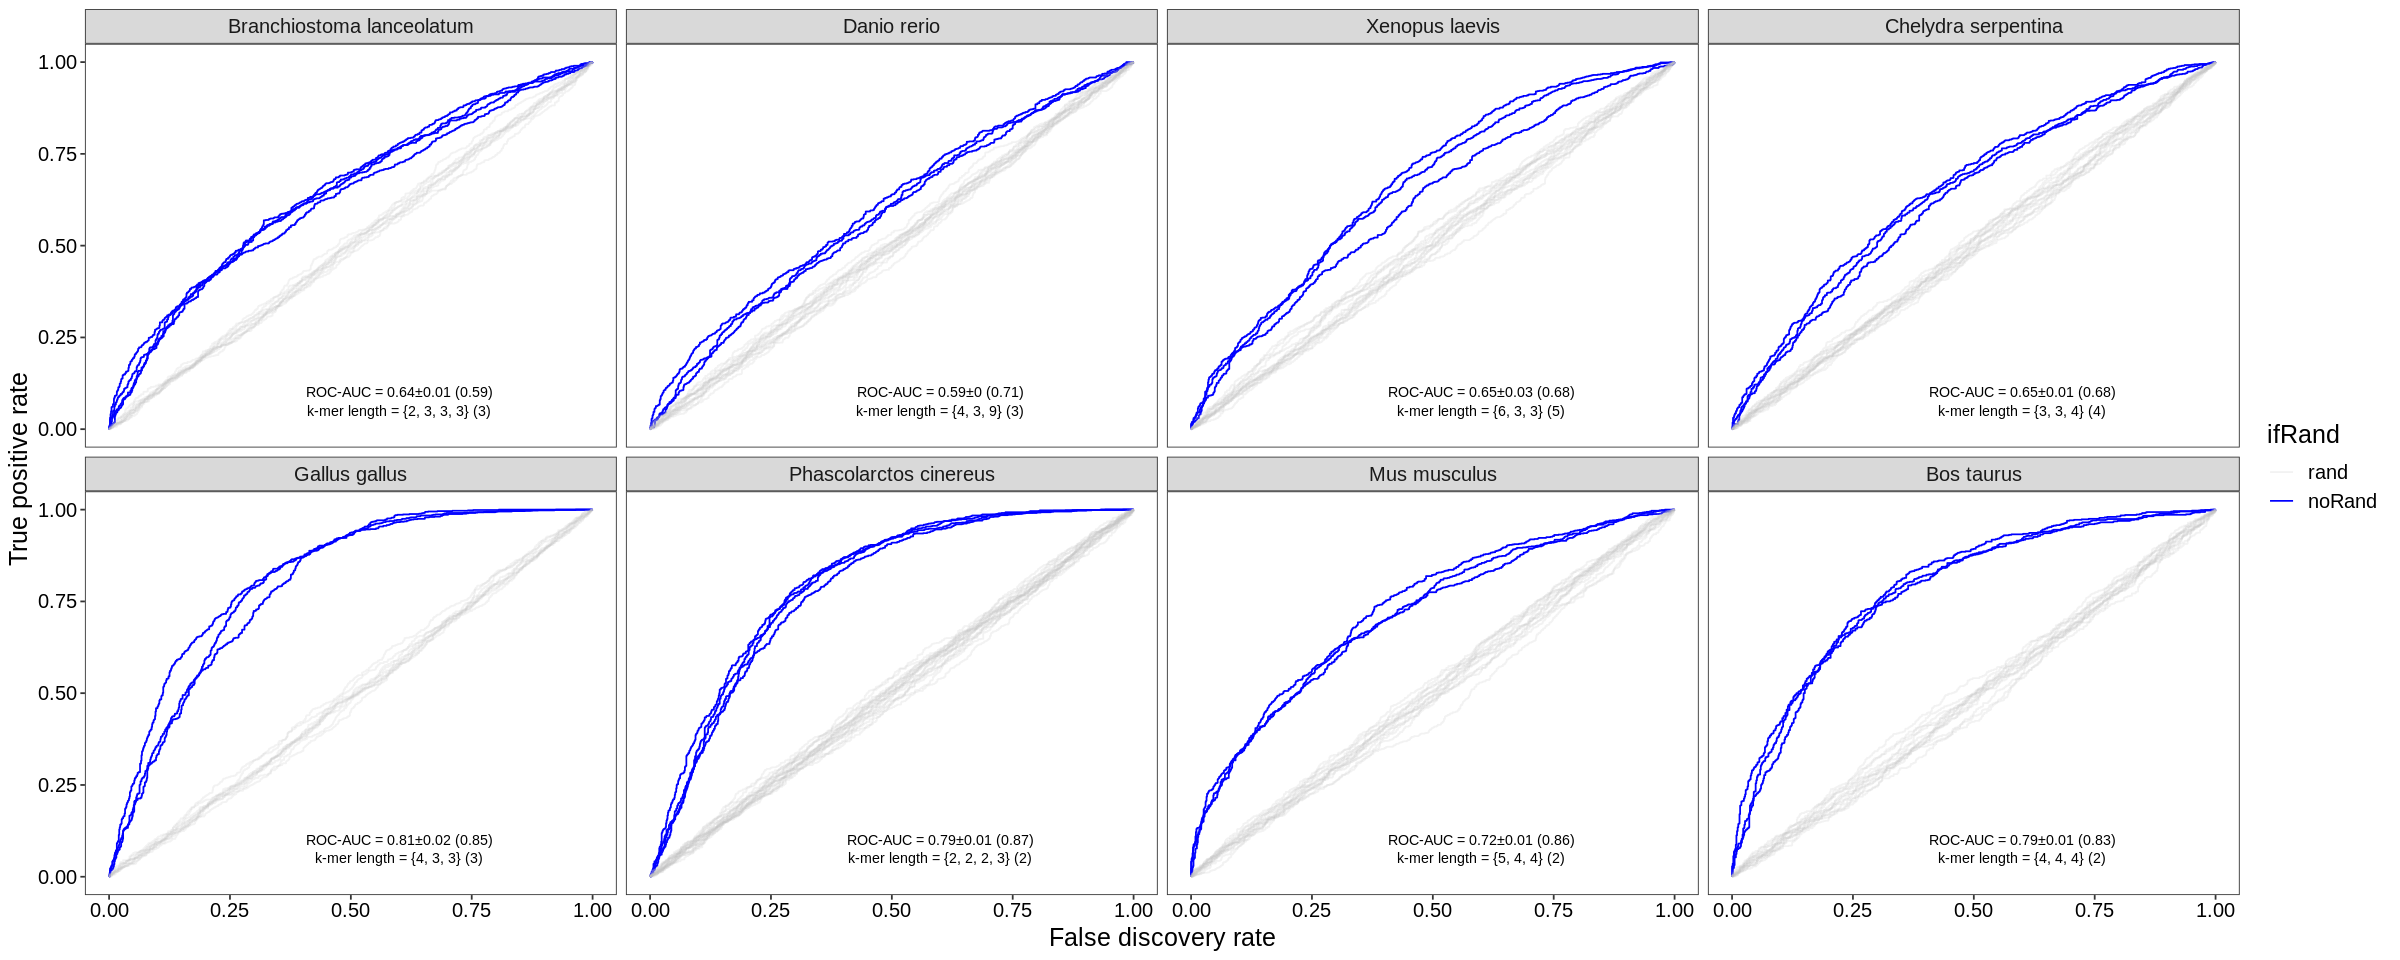

In [145]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(roc_res_full, aes(x = fdr, y = tpr, color = ifRand)) + 
        geom_line(aes(group=unique_run, alpha=ifRand)) +  facet_wrap(.~species, ncol = 7) + 
    geom_text(data=auc_res,aes(x=x,y=y,
                               label=paste0("ROC-AUC = ",round(mean_auc,2), "±", round(auc_sd, 2), 
                                            " (",round(AUC,2), ")")), color = "black", size = 3)+
geom_text(data=k_res,aes(x=x,y=y,
                               label=paste0("k-mer length = {",K, "} (", k,")")), color = "black", size = 3)+
 scale_color_manual(values=c("rand"="grey","noRand"="blue"))+
    scale_alpha_manual(values=c("rand"=0.2,"noRand"=1)) + 
    labs(x = "False discovery rate", y = "True positive rate") +
    theme(text = element_text(size = 15)) + 
facet_wrap(.~factor(species, levels = WGBS_species_order), ncol = 4)
ggsave("summary/WGBS_auc.pdf", width = 10, height = 8)

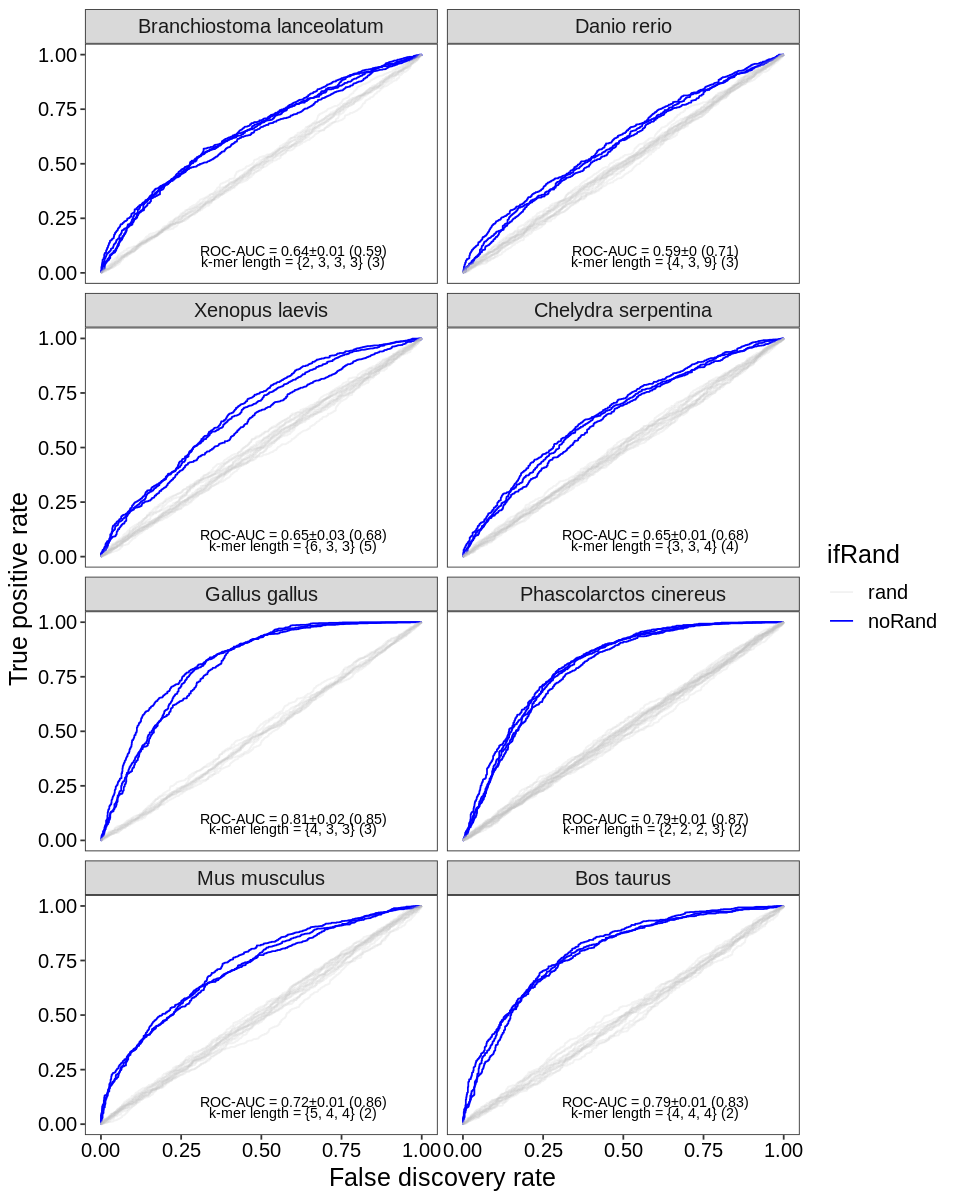

In [147]:
options(repr.plot.width = 8, repr.plot.height = 10)
ggplot(roc_res_full, aes(x = fdr, y = tpr, color = ifRand)) + 
        geom_line(aes(group=unique_run, alpha=ifRand)) +  facet_wrap(.~species, ncol = 7) + 
    geom_text(data=auc_res,aes(x=x,y=y,
                               label=paste0("ROC-AUC = ",round(mean_auc,2), "±", round(auc_sd, 2), 
                                            " (",round(AUC,2), ")")), color = "black", size = 3)+
geom_text(data=k_res,aes(x=x,y=y,
                               label=paste0("k-mer length = {",K, "} (", k,")")), color = "black", size = 3)+
 scale_color_manual(values=c("rand"="grey","noRand"="blue"))+
    scale_alpha_manual(values=c("rand"=0.2,"noRand"=1)) + 
    labs(x = "False discovery rate", y = "True positive rate") +
    theme(text = element_text(size = 15)) + 
facet_wrap(.~factor(species, levels = WGBS_species_order), ncol = 2)
ggsave("summary/WGBS_auc_vert.pdf", width = 8, height = 10)